#### Import necessary libraries

In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

C:\ProgramData\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
df = pd.read_csv('C:\\Users\\SRyapaku\\Desktop\\nyt_ftpg_1996_2006_no_text.csv', encoding = "ISO-8859-1")

sia = SIA()
results_title = []
results_summary = []

In [3]:
for i0 in range(len(df['Title'])):
    pol_score = sia.polarity_scores(df['Title'][i0])['compound']
    results_title.append(pol_score)
    pol_score = sia.polarity_scores(df['Summary'][i0])['compound']
    results_summary.append(pol_score)

df['Title_senti'] = results_title * df['Topic_4digit']
df['Summary_senti'] = results_summary * df['Topic_4digit']

df_1 = df.groupby(['Date'])['Title_senti' , 'Summary_senti', 'Topic_4digit'].sum().reset_index()
df_1['Title_senti'] /= df_1['Topic_4digit']
df_1['Summary_senti'] /= df_1['Topic_4digit']

In [4]:
# Pull NASDAQ related data
df_market = pd.read_csv('C:\\Users\\SRyapaku\\Desktop\\IXIC.csv', encoding = "ISO-8859-1")
df_1 = pd.merge(df_1, df_market, how='left', on='Date')
df_1['Date'] = pd.to_datetime(df_1['Date'])
df_1 = df_1.sort_values('Date')
df_1 = df_1.fillna(df_1.mean())
df_1['Title_senti'] = df_1['Title_senti'].rolling(window=90).mean()
df_1['Summary_senti'] = df_1['Summary_senti'].rolling(window=90).mean()
df_1 = df_1.set_index('Date')

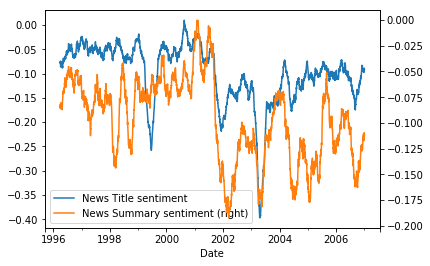

In [12]:
df_1.Title_senti.plot(label="News Title sentiment", legend=True)
df_1.Summary_senti.plot(secondary_y=True, label="News Summary sentiment", legend=True)
plt.show()

### Observations:
1. Genral tone of front page news is broadly negative, 
2. while over time it deteriorated further post 2001 terror attacks

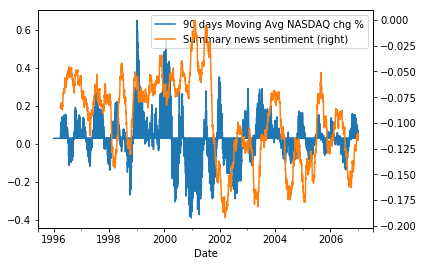

In [10]:
df_1.MA_perc_chg.plot(label="90 days Moving Avg NASDAQ chg %", legend=True)
df_1.Summary_senti.plot(secondary_y=True, label="Summary news sentiment", legend=True)
plt.show()

### Observations:
1. News paper front page sentiment leads stock market reaction when positive (1997, 2003, 2005), while  
2. news paper front page sentiment lags stock market reaction when negative (1998, 2002, 2004)